In [436]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots
import tensorflow_docs as tfdocs
from keras.optimizers import adam
from keras.utils import plot_model
from tensorflow import keras
from keras.models import Sequential, save_model, load_model
from keras.layers import LSTM, Dense, Dropout, GRU
from sklearn.preprocessing import MinMaxScaler


In [437]:
inputs = pd.read_csv('Predictions--M2+TI.csv')
inputs.head()

,Unnamed: 0,Unnamed: 0.1,Date,Predicted Price,21 SMA,50 SMA,100 SMA,200 SMA,RSI,21-avg volume,Upper BBand,Middle BBand,Lower BBand,52-week high,52-week low,MACD,Close,Score
0,283,283,2016-02-05,533.11273,507.525152,519.098944,536.939936,536.254726,65.805443,4900.000000,543.609544,506.468375,469.327206,588.5237,378.7857,Bullish,546.7055,-0.500000
1,284,284,2016-02-08,555.74480,508.896100,519.760506,537.195101,536.725971,69.197385,5145.238095,551.163998,508.260995,465.357992,588.5237,378.7857,Bullish,557.4506,-1.000000
2,285,285,2016-02-09,542.00714,510.268995,520.442526,537.380050,537.076076,64.682093,5709.523810,557.078174,510.413280,463.748386,588.5237,378.7857,Bullish,550.4290,-0.666667
3,286,286,2016-02-10,551.68770,511.827776,520.917994,537.314581,537.258181,58.631611,8183.333333,559.987064,511.599900,463.212736,588.5237,378.7857,Bullish,540.1177,-1.000000
4,287,287,2016-02-11,546.17530,512.352305,521.139116,537.121939,537.434014,52.152077,11309.523810,561.292362,513.435890,465.579418,588.5237,378.7857,Bullish,527.4004,0.000000


In [438]:
inputs.describe()

,Unnamed: 0,Unnamed: 0.1,Predicted Price,21 SMA,50 SMA,100 SMA,200 SMA,RSI,21-avg volume,Upper BBand,Middle BBand,Lower BBand,52-week high,52-week low,Close,Score
count,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000
mean,892.500000,892.500000,595.370481,594.335526,591.737429,589.647618,591.803424,50.641552,24757.673419,633.563616,594.443727,555.323838,751.273545,458.075973,596.435487,0.073820
std,352.327972,352.327972,146.272711,144.756724,141.553004,136.351171,124.986674,14.727982,26299.345835,148.214235,144.875690,144.442100,135.846504,109.632079,147.102959,0.505605
min,283.000000,283.000000,301.873600,314.568471,319.318274,340.871358,364.150081,17.881905,621.428571,331.253628,312.986035,255.666703,469.768400,297.952000,297.952000,-1.000000
25%,587.750000,587.750000,505.282263,510.513451,520.799127,527.581212,520.592888,40.193838,5545.238095,546.497512,511.247299,451.193318,655.928900,343.423025,506.312125,0.000000
50%,892.500000,892.500000,607.984450,605.149271,603.920737,588.254588,587.711743,50.345344,13902.380952,646.890362,604.788472,565.564949,704.574600,478.740700,608.630800,0.000000
75%,1197.250000,1197.250000,685.207925,687.348029,684.444697,665.226236,674.195879,60.751006,36071.428571,719.656685,687.292867,650.209290,873.122600,548.633900,688.026200,0.400000
max,1502.000000,1502.000000,959.511960,890.957310,859.307754,840.099523,814.862280,87.740593,132909.523810,979.188809,892.893660,835.165337,957.071100,663.024100,957.071100,1.000000


In [439]:
inputs['Close'] = pd.to_numeric(inputs['Close'])
inputs['Score'] = pd.to_numeric(inputs['Score'])
inputs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1220 entries, 0 to 1219
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1220 non-null   int64  
 1   Unnamed: 0.1     1220 non-null   int64  
 2   Date             1220 non-null   object 
 3   Predicted Price  1220 non-null   float64
 4   21 SMA           1220 non-null   float64
 5   50 SMA           1220 non-null   float64
 6   100 SMA          1220 non-null   float64
 7   200 SMA          1220 non-null   float64
 8   RSI              1220 non-null   float64
 9   21-avg volume    1220 non-null   float64
 10  Upper BBand      1220 non-null   float64
 11  Middle BBand     1220 non-null   float64
 12  Lower BBand      1220 non-null   float64
 13  52-week high     1220 non-null   float64
 14  52-week low      1220 non-null   float64
 15  MACD             1220 non-null   object 
 16  Close            1220 non-null   float64
 17  Score         

In [440]:
temp = inputs['Close'].diff()
print(temp.head())
temp = temp[1:]
print(temp.head())

inputs['Label'] = temp
inputs.tail()

0        NaN
1    10.7451
2    -7.0216
3   -10.3113
4   -12.7173
Name: Close, dtype: float64
1    10.7451
2    -7.0216
3   -10.3113
4   -12.7173
5     6.6942
Name: Close, dtype: float64


,Unnamed: 0,Unnamed: 0.1,Date,Predicted Price,21 SMA,50 SMA,100 SMA,200 SMA,RSI,21-avg volume,Upper BBand,Middle BBand,Lower BBand,52-week high,52-week low,MACD,Close,Score,Label
1215,1498,1498,2020-10-02,769.32690,763.625714,704.062752,633.951345,510.033793,54.421634,40114.285714,785.375385,764.0730,742.770615,777.94,297.952,Bearish,756.13,0.800000,-11.20
1216,1499,1499,2020-10-05,760.92150,763.524286,707.054050,637.075427,511.625766,52.597910,37661.904762,784.911587,764.3400,743.768413,777.94,297.952,Bearish,752.55,0.000000,-3.58
1217,1500,1500,2020-10-06,752.31024,763.677619,709.937646,639.925730,513.223678,51.497360,34704.761905,784.801250,764.4000,743.998750,777.94,297.952,Bearish,750.43,0.000000,-2.12
1218,1501,1501,2020-10-07,749.86470,764.383333,713.068540,642.967828,514.874502,57.630966,34497.619048,782.682326,765.6005,748.518674,777.94,297.952,Bearish,764.05,-0.888889,13.62
1219,1502,1502,2020-10-08,758.65050,765.849524,716.152268,646.060959,516.524509,60.320947,33004.761905,782.823961,765.6695,748.515039,777.94,297.952,Bearish,770.83,0.000000,6.78


In [441]:
temp = inputs['Predicted Price'].diff()
print(temp.head())
temp = temp[1:]
print(temp.head())

inputs['Diff'] = temp
inputs.tail()

0         NaN
1    22.63207
2   -13.73766
3     9.68056
4    -5.51240
Name: Predicted Price, dtype: float64
1    22.63207
2   -13.73766
3     9.68056
4    -5.51240
5   -10.26307
Name: Predicted Price, dtype: float64


,Unnamed: 0,Unnamed: 0.1,Date,Predicted Price,21 SMA,50 SMA,100 SMA,200 SMA,RSI,21-avg volume,Upper BBand,Middle BBand,Lower BBand,52-week high,52-week low,MACD,Close,Score,Label,Diff
1215,1498,1498,2020-10-02,769.32690,763.625714,704.062752,633.951345,510.033793,54.421634,40114.285714,785.375385,764.0730,742.770615,777.94,297.952,Bearish,756.13,0.800000,-11.20,4.95477
1216,1499,1499,2020-10-05,760.92150,763.524286,707.054050,637.075427,511.625766,52.597910,37661.904762,784.911587,764.3400,743.768413,777.94,297.952,Bearish,752.55,0.000000,-3.58,-8.40540
1217,1500,1500,2020-10-06,752.31024,763.677619,709.937646,639.925730,513.223678,51.497360,34704.761905,784.801250,764.4000,743.998750,777.94,297.952,Bearish,750.43,0.000000,-2.12,-8.61126
1218,1501,1501,2020-10-07,749.86470,764.383333,713.068540,642.967828,514.874502,57.630966,34497.619048,782.682326,765.6005,748.518674,777.94,297.952,Bearish,764.05,-0.888889,13.62,-2.44554
1219,1502,1502,2020-10-08,758.65050,765.849524,716.152268,646.060959,516.524509,60.320947,33004.761905,782.823961,765.6695,748.515039,777.94,297.952,Bearish,770.83,0.000000,6.78,8.78580


In [442]:
for i in range(len(inputs)):
    
    x = inputs['Label'][i]
    
    if x > 0.3:
        
        inputs['Label'][i] = 1
        
    elif x < -0.3:
        
        inputs['Label'][i] = -1
        
    else:
        
        inputs['Label'][i] = 0

C:\Users\CZ\anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\Users\CZ\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\CZ\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path(

In [443]:
for i in range(len(inputs)):
    
    x = inputs['Diff'][i]
    
    if x > 0.3:
        
        inputs['Diff'][i] = 1
        
    elif x < -0.3:
        
        inputs['Diff'][i] = -1
        
    else:
        
        inputs['Diff'][i] = 0

C:\Users\CZ\anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\Users\CZ\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\CZ\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path(

In [444]:
for i in range(len(inputs)):
    
    x = inputs['Score'][i]
    
    if x > 0.3:
        
        inputs['Score'][i] = 1
        
    elif x < -0.3:
        
        inputs['Score'][i] = -1
        
    else:
        
        inputs['Score'][i] = 0

C:\Users\CZ\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\CZ\anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\Users\CZ\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sy

In [445]:
inputs.tail(25)

,Unnamed: 0,Unnamed: 0.1,Date,Predicted Price,21 SMA,50 SMA,100 SMA,200 SMA,RSI,21-avg volume,Upper BBand,Middle BBand,Lower BBand,52-week high,52-week low,MACD,Close,Score,Label,Diff
1195,1478,1478,2020-09-04,752.84560,687.700343,643.241560,567.073190,477.278625,83.101788,117204.761905,784.008362,691.591945,599.175528,758.3863,297.952,Bullish,754.68,0.0,-1.0,1.0
1196,1479,1479,2020-09-07,756.36145,694.240424,645.322038,570.144430,478.813570,77.583536,120376.190476,786.195345,698.339410,610.483475,758.3863,297.952,Bullish,747.21,0.0,-1.0,1.0
1197,1480,1480,2020-09-08,757.45984,700.762771,647.305056,573.474351,480.453554,78.008797,119252.380952,789.119477,704.220110,619.320743,758.3863,297.952,Bullish,749.23,0.0,1.0,1.0
1198,1481,1481,2020-09-09,748.66270,705.925819,649.421764,576.649690,482.033220,71.374703,120173.809524,788.784107,709.703080,630.622053,758.3863,297.952,Bullish,740.04,0.0,-1.0,-1.0
1199,1482,1482,2020-09-10,740.93190,712.548171,652.306694,580.079109,483.782356,77.862888,117819.047619,793.569862,715.793210,638.016558,758.3863,297.952,Bullish,769.45,0.0,1.0,-1.0
1200,1483,1483,2020-09-11,758.83760,717.426390,654.784226,583.302585,485.432185,67.083717,121742.857143,793.377374,720.915340,648.453306,769.4500,297.952,Bearish,750.09,0.0,-1.0,1.0
1201,1484,1484,2020-09-14,754.41170,723.255086,657.659978,586.763366,487.165710,71.469123,113685.714286,798.692385,725.152890,651.613395,769.4500,297.952,Bearish,770.05,-1.0,1.0,-1.0
1202,1485,1485,2020-09-15,757.15770,727.596086,660.728054,590.370698,488.828775,72.725827,110823.809524,803.419357,730.125695,656.832033,770.0500,297.952,Bearish,776.46,1.0,1.0,1.0
1203,1486,1486,2020-09-16,769.01950,731.924948,663.610816,593.835441,490.447355,68.398150,87971.428571,804.851169,734.920050,664.988931,776.4600,297.952,Bearish,767.91,-1.0,-1.0,1.0
1204,1487,1487,2020-09-17,768.45640,736.246238,666.479024,597.068646,492.067332,65.860831,86659.523810,804.731676,739.229435,673.727194,776.4600,297.952,Bearish,762.77,-1.0,-1.0,-1.0


In [446]:
inputs.describe()

,Unnamed: 0,Unnamed: 0.1,Predicted Price,21 SMA,50 SMA,100 SMA,200 SMA,RSI,21-avg volume,Upper BBand,Middle BBand,Lower BBand,52-week high,52-week low,Close,Score,Label,Diff
count,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000
mean,892.500000,892.500000,595.370481,594.335526,591.737429,589.647618,591.803424,50.641552,24757.673419,633.563616,594.443727,555.323838,751.273545,458.075973,596.435487,0.096721,-0.022131,0.010656
std,352.327972,352.327972,146.272711,144.756724,141.553004,136.351171,124.986674,14.727982,26299.345835,148.214235,144.875690,144.442100,135.846504,109.632079,147.102959,0.659745,0.918501,0.977542
min,283.000000,283.000000,301.873600,314.568471,319.318274,340.871358,364.150081,17.881905,621.428571,331.253628,312.986035,255.666703,469.768400,297.952000,297.952000,-1.000000,-1.000000,-1.000000
25%,587.750000,587.750000,505.282263,510.513451,520.799127,527.581212,520.592888,40.193838,5545.238095,546.497512,511.247299,451.193318,655.928900,343.423025,506.312125,0.000000,-1.000000,-1.000000
50%,892.500000,892.500000,607.984450,605.149271,603.920737,588.254588,587.711743,50.345344,13902.380952,646.890362,604.788472,565.564949,704.574600,478.740700,608.630800,0.000000,0.000000,0.000000
75%,1197.250000,1197.250000,685.207925,687.348029,684.444697,665.226236,674.195879,60.751006,36071.428571,719.656685,687.292867,650.209290,873.122600,548.633900,688.026200,1.000000,1.000000,1.000000
max,1502.000000,1502.000000,959.511960,890.957310,859.307754,840.099523,814.862280,87.740593,132909.523810,979.188809,892.893660,835.165337,957.071100,663.024100,957.071100,1.000000,1.000000,1.000000


In [447]:
new_inputs = pd.DataFrame(columns = [ 'Price', 'Score','RSI', 'Label'])
new_inputs['Price'] = inputs['Diff']
new_inputs['Score'] = inputs['Score']
new_inputs['RSI'] = inputs['RSI']
new_inputs['Label'] = inputs['Label']

new_inputs.head()


,Price,Score,RSI,Label
0,0.0,-1.0,65.805443,0.0
1,1.0,-1.0,69.197385,1.0
2,-1.0,-1.0,64.682093,-1.0
3,1.0,-1.0,58.631611,-1.0
4,-1.0,0.0,52.152077,-1.0


Positive: 501 , Negative: 528 , Neutral: 191


Text(0.5, 1.0, 'Sentiment Data Distribution')

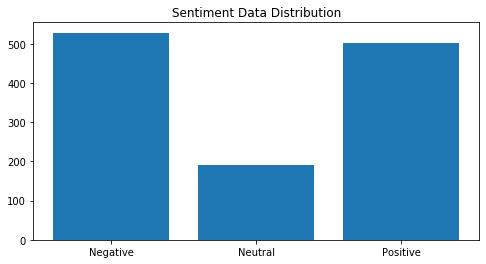

In [448]:

plt.figure(figsize=(8,4))
count_pos = new_inputs['Label'].value_counts()[1]
count_ntl = new_inputs['Label'].value_counts()[0]
count_neg = new_inputs['Label'].value_counts()[-1]

print('Positive:', count_pos, ',', 'Negative:', count_neg, ',', 'Neutral:', count_ntl)

plt.bar(['Negative', 'Neutral', 'Positive'], [count_neg, count_ntl, count_pos])
plt.title("Sentiment Data Distribution")

In [449]:
new_inputs.head()


,Price,Score,RSI,Label
0,0.0,-1.0,65.805443,0.0
1,1.0,-1.0,69.197385,1.0
2,-1.0,-1.0,64.682093,-1.0
3,1.0,-1.0,58.631611,-1.0
4,-1.0,0.0,52.152077,-1.0


In [450]:
#new_inputs = new_inputs.sample(frac=1).reset_index(drop=True)
new_inputs.head()

,Price,Score,RSI,Label
0,0.0,-1.0,65.805443,0.0
1,1.0,-1.0,69.197385,1.0
2,-1.0,-1.0,64.682093,-1.0
3,1.0,-1.0,58.631611,-1.0
4,-1.0,0.0,52.152077,-1.0


Positive: 342 , Negative: 381 , Neutral: 131
[ 0.         -1.         65.80544272  0.        ]
122
244


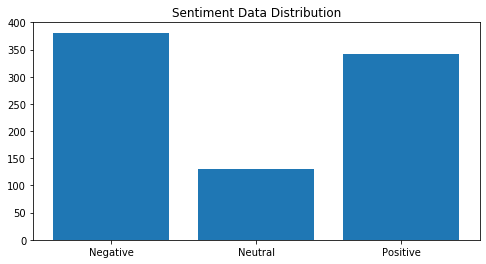

In [451]:
train_data = new_inputs[:int(len(new_inputs)*0.7)]
test_data = new_inputs[int(len(new_inputs)*0.7):int(len(new_inputs)*0.8)]
val_data = new_inputs[int(len(new_inputs)*0.8):]

#Convert to ndarray


plt.figure(figsize=(8,4))
count_pos = train_data['Label'].value_counts()[1]
count_ntl = train_data['Label'].value_counts()[0]
count_neg = train_data['Label'].value_counts()[-1]

print('Positive:', count_pos, ',', 'Negative:', count_neg, ',', 'Neutral:', count_ntl)

plt.bar(['Negative', 'Neutral', 'Positive'], [count_neg, count_ntl, count_pos])
plt.title("Sentiment Data Distribution")

train_data = np.asarray(train_data)
test_data = np.asarray(test_data)
val_data = np.asarray(val_data)
    
#Transform data

    

print(train_data[0])
print(test_data.shape[0])
print(val_data.shape[0])

In [452]:
def data_prep(train_data):
    x_train = []
    y_train = []

    for i in range(train_data.shape[0]):

        x_train.append(train_data[i][3:])
        y_train.append(train_data[i][3:])

    x_train = np.array(x_train) 
    y_train = np.array(y_train)

    return x_train, y_train

x_train, y_train = data_prep(train_data)
x_test, y_test = data_prep(test_data)
x_val, y_val = data_prep(val_data)

y_val

array([[ 1.],
       [-1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [-1.],
       [-1.],
       [ 1.],
       [ 1.],
       [-1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [-1.],
       [ 1.],
       [-1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [-1.],
       [ 1.],
       [ 1.],
       [-1.],
       [ 1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [ 0.],
       [ 1.],
       [-1.],
       [ 1.],
       [-1.],
       [ 1.],
       [ 1.],
       [-1.],
       [-1.],
       [ 1.],
       [-1.],
       [ 1.],
       [ 1.],
       [-1.],
       [-1.],
       [ 1.],
       [ 1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [ 0.],
       [ 1.],
       [-1.],
       [ 1.],
       [ 0.],
       [-1.],
       [-1.],
       [-1.],
      

In [453]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train, num_classes=3)
y_test = to_categorical(y_test, num_classes=3)
y_val = to_categorical(y_val, num_classes=3)
#labels = np.argmax(labels, axis=1)
print(y_train[:10])
print(y_test[:10])

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


In [454]:
#y_train = y_train.reshape(-1,1)
#y_test = y_test.reshape(-1,1)

print("x_train shape:", x_train.shape)

print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
print(y_test)

x_train shape: (854, 1)
y_train shape: (854, 3)
y_test shape: (122, 3)
[[0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_135 (Dense)            (None, 64)                128       
_________________________________________________________________
dense_136 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_137 (Dense)            (None, 3)                 99        
Total params: 2,307
Trainable params: 2,307
Non-trainable params: 0
_________________________________________________________________


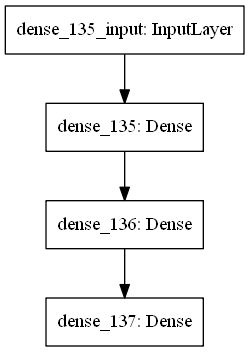

In [455]:
import keras
from keras.models import Sequential
from keras.layers import Dense

def create_model(x_train, units_1, units_2):
    
    # Neural network
    model = Sequential()
    model.add(Dense(64, input_dim=1, activation= 'relu'))
    model.add(Dense(32, activation= 'relu'))
    model.add(Dense(3, activation= 'softmax'))

    return model
    
    
model = create_model(x_train, 16, 32)

model.summary()

plot_model(model, to_file='model.png')

In [456]:
def compile_model(model, x_train, y_train, x_test, y_test):

    model.compile(optimizer='adam', loss= 'categorical_crossentropy', metrics=['acc'])
    history = model.fit(x_train, y_train, epochs=5, batch_size=16, validation_data = (x_test, y_test), verbose = 1, )
    return history

history = compile_model(model, x_train, y_train, x_test, y_test)

Train on 854 samples, validate on 122 samples
Epoch 1/5
854/854 [==============================] - 2s 2ms/step - loss: 0.6414 - acc: 0.8536 - val_loss: 0.5092 - val_acc: 0.6885
Epoch 2/5
854/854 [==============================] - 0s 327us/step - loss: 0.2488 - acc: 0.8817 - val_loss: 0.3353 - val_acc: 1.0000
Epoch 3/5
854/854 [==============================] - 0s 339us/step - loss: 0.1487 - acc: 1.0000 - val_loss: 0.2131 - val_acc: 1.0000
Epoch 4/5
854/854 [==============================] - ETA: 0s - loss: 0.0884 - acc: 1.000 - 0s 345us/step - loss: 0.0812 - acc: 1.0000 - val_loss: 0.0903 - val_acc: 1.0000
Epoch 5/5
854/854 [==============================] - 0s 324us/step - loss: 0.0340 - acc: 1.0000 - val_loss: 0.0372 - val_acc: 1.0000


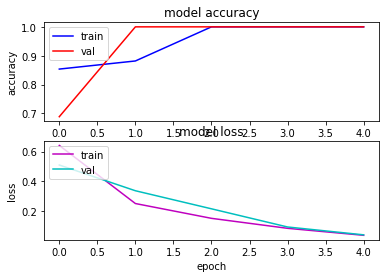

In [457]:
s, (at, al) = plt.subplots(2,1)
at.plot(history.history['acc'], c= 'b')
at.plot(history.history['val_acc'], c='r')
at.set_title('model accuracy')
at.set_ylabel('accuracy')
at.set_xlabel('epoch')
at.legend(['train', 'val'], loc='upper left')

al.plot(history.history['loss'], c='m')
al.plot(history.history['val_loss'], c='c')
al.set_title('model loss')
al.set_ylabel('loss')
al.set_xlabel('epoch')
al.legend(['train', 'val'], loc = 'upper left')

In [458]:
def decode_sentiment(score):
    if score[0] > score[1] and score[0] > score[2]:
        print(score[0], '0\n---')
        return 0
    elif score[1] > score[0] and score[1] > score[2]:
        print(score[1], '1\n---')
        return 1
    elif score[2] > score[0] and score[2] > score[1]:
        print(score[2], '-1\n---')
        return -1

scores = model.predict(x_test, verbose=1, batch_size=10)
y_pred_1d = [decode_sentiment(score) for score in scores]
temp = [decode_sentiment(score) for score in y_test]
temp

122/122 [==============================] - 2s 14ms/step
0.9953818 1
---
0.9907659 -1
---
0.9907659 -1
---
0.90140855 0
---
0.90140855 0
---
0.9953818 1
---
0.9907659 -1
---
0.9953818 1
---
0.9907659 -1
---
0.9953818 1
---
0.90140855 0
---
0.90140855 0
---
0.9953818 1
---
0.90140855 0
---
0.90140855 0
---
0.90140855 0
---
0.90140855 0
---
0.9907659 -1
---
0.90140855 0
---
0.9907659 -1
---
0.9953818 1
---
0.90140855 0
---
0.9907659 -1
---
0.90140855 0
---
0.9953818 1
---
0.90140855 0
---
0.90140855 0
---
0.9907659 -1
---
0.9907659 -1
---
0.90140855 0
---
0.9953818 1
---
0.9953818 1
---
0.9907659 -1
---
0.9953818 1
---
0.9953818 1
---
0.9907659 -1
---
0.90140855 0
---
0.9907659 -1
---
0.9953818 1
---
0.9907659 -1
---
0.9907659 -1
---
0.90140855 0
---
0.9907659 -1
---
0.9907659 -1
---
0.9953818 1
---
0.9907659 -1
---
0.9907659 -1
---
0.9953818 1
---
0.9953818 1
---
0.9953818 1
---
0.9953818 1
---
0.9907659 -1
---
0.9907659 -1
---
0.9953818 1
---
0.9907659 -1
---
0.9907659 -1
---
0.9953818 

[1,
 -1,
 -1,
 0,
 0,
 1,
 -1,
 1,
 -1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 -1,
 0,
 -1,
 1,
 0,
 -1,
 0,
 1,
 0,
 0,
 -1,
 -1,
 0,
 1,
 1,
 -1,
 1,
 1,
 -1,
 0,
 -1,
 1,
 -1,
 -1,
 0,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 0,
 -1,
 -1,
 1,
 0,
 0,
 0,
 0,
 0,
 -1,
 1,
 1,
 0,
 0,
 1,
 -1,
 -1,
 0,
 -1,
 0,
 -1,
 -1,
 -1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 0,
 1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 0,
 1,
 1,
 0,
 -1,
 -1]

In [459]:
print(scores)

[[4.5961021e-03 9.9538177e-01 2.2128315e-05]
 [9.2175491e-03 1.6507976e-05 9.9076593e-01]
 [9.2175491e-03 1.6507976e-05 9.9076593e-01]
 [9.0140855e-01 4.1295633e-02 5.7295799e-02]
 [9.0140855e-01 4.1295633e-02 5.7295799e-02]
 [4.5961021e-03 9.9538177e-01 2.2128315e-05]
 [9.2175491e-03 1.6507976e-05 9.9076593e-01]
 [4.5961021e-03 9.9538177e-01 2.2128315e-05]
 [9.2175491e-03 1.6507976e-05 9.9076593e-01]
 [4.5961021e-03 9.9538177e-01 2.2128315e-05]
 [9.0140855e-01 4.1295633e-02 5.7295799e-02]
 [9.0140855e-01 4.1295633e-02 5.7295799e-02]
 [4.5961021e-03 9.9538177e-01 2.2128315e-05]
 [9.0140855e-01 4.1295633e-02 5.7295799e-02]
 [9.0140855e-01 4.1295633e-02 5.7295799e-02]
 [9.0140855e-01 4.1295633e-02 5.7295799e-02]
 [9.0140855e-01 4.1295633e-02 5.7295799e-02]
 [9.2175491e-03 1.6507976e-05 9.9076593e-01]
 [9.0140855e-01 4.1295633e-02 5.7295799e-02]
 [9.2175491e-03 1.6507976e-05 9.9076593e-01]
 [4.5961021e-03 9.9538177e-01 2.2128315e-05]
 [9.0140855e-01 4.1295633e-02 5.7295799e-02]
 [9.217549

In [460]:
import itertools
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=13)
    plt.yticks(tick_marks, classes, fontsize=13)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=17)
    plt.xlabel('Predicted label', fontsize=17)

In [461]:
#print(test_data)
print(y_pred_1d)
#cnf_matrix = confusion_matrix(test_data['Label'].to_list(), y_pred_1d)


[1, -1, -1, 0, 0, 1, -1, 1, -1, 1, 0, 0, 1, 0, 0, 0, 0, -1, 0, -1, 1, 0, -1, 0, 1, 0, 0, -1, -1, 0, 1, 1, -1, 1, 1, -1, 0, -1, 1, -1, -1, 0, -1, -1, 1, -1, -1, 1, 1, 1, 1, -1, -1, 1, -1, -1, 1, 1, 0, -1, -1, 1, 0, 0, 0, 0, 0, -1, 1, 1, 0, 0, 1, -1, -1, 0, -1, 0, -1, -1, -1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, -1, 1, -1, 1, -1, 0, 1, -1, 1, 1, 1, -1, 1, -1, -1, -1, -1, -1, -1, 1, 0, 1, 1, 0, -1, -1]


In [462]:
print(temp)

[1, -1, -1, 0, 0, 1, -1, 1, -1, 1, 0, 0, 1, 0, 0, 0, 0, -1, 0, -1, 1, 0, -1, 0, 1, 0, 0, -1, -1, 0, 1, 1, -1, 1, 1, -1, 0, -1, 1, -1, -1, 0, -1, -1, 1, -1, -1, 1, 1, 1, 1, -1, -1, 1, -1, -1, 1, 1, 0, -1, -1, 1, 0, 0, 0, 0, 0, -1, 1, 1, 0, 0, 1, -1, -1, 0, -1, 0, -1, -1, -1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, -1, 1, -1, 1, -1, 0, 1, -1, 1, 1, 1, -1, 1, -1, -1, -1, -1, -1, -1, 1, 0, 1, 1, 0, -1, -1]


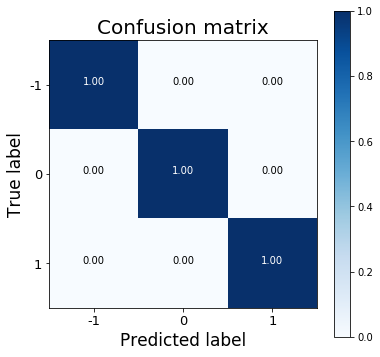

In [463]:
cnf_matrix = confusion_matrix(temp, y_pred_1d)
plt.figure(figsize=(6,6))
plot_confusion_matrix(cnf_matrix, classes=[-1, 0, 1], title="Confusion matrix")
plt.show()

In [464]:
print(y_test)


[[0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1.